In [14]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%load_ext autoreload
%autoreload 2

In [43]:
import os
import numpy as np
import hashlib
from PIL import Image

import camera_hash
from utils import numpy_arrays_from_paths

In [39]:
def gen_random_numpy(nbits=64, seed=7):
    np.random.seed(seed)
    nbytes = nbits // 8 
    rand = np.random.randint(0, 2**8, nbytes).tolist()
    return bytes(rand)

In [40]:
outfile='randnum_numpy.bin'
rand = gen_random_numpy(nbits=2**20)
with open(outfile, 'wb') as f:
    _= f.write(rand)

In [41]:
n_photos = 2
photos_paths = [os.path.join('./camera_noise', path) for path in os.listdir('./camera_noise')[:n_photos]]
frames = numpy_arrays_from_paths(photos_paths)

In [42]:
outfile='randnum_camera_hash.bin'
rand = camera_hash.random_bits(frames, nbits=2**20)
with open(outfile, 'wb') as f:
    _= f.write(rand)

In [44]:
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [157]:
mydir = 'C:\\Users\\jurg96\\jurg96-windows\\Фото с айфона'

ratios = []
i = -1
for file in os.listdir(mydir):
    i+=1
    if i == 500:
        break
    if not file.endswith('.JPG'):
        continue
    
    try:
        img = Image.open(os.path.join(mydir, file))
        data = np.array(img).astype(np.uint8)
    #     data = data[:,:,0]
        data = np.round(np.mean(data, axis=2))

        nbits = 1
        data = (data % 2**(nbits))
        ratios.append(data.sum() / len(data.flatten()))
    except:
        pass

(array([  1.,   0.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,  10., 351.,
         31.,  13.,  16.,   8.,   5.,   3.,   3.,   3.,   1.,   1.,   0.,
          1.,   0.,   0.,   0.,   2.,   0.,   0.,   3.,   1.,   0.,   0.,
          0.,   1.]),
 array([0.38308959, 0.39423981, 0.40539003, 0.41654026, 0.42769048,
        0.4388407 , 0.44999092, 0.46114115, 0.47229137, 0.48344159,
        0.49459182, 0.50574204, 0.51689226, 0.52804249, 0.53919271,
        0.55034293, 0.56149315, 0.57264338, 0.5837936 , 0.59494382,
        0.60609405, 0.61724427, 0.62839449, 0.63954471, 0.65069494,
        0.66184516, 0.67299538, 0.68414561, 0.69529583, 0.70644605,
        0.71759628, 0.7287465 , 0.73989672, 0.75104694, 0.76219717,
        0.77334739]),
 <a list of 35 Patch objects>)

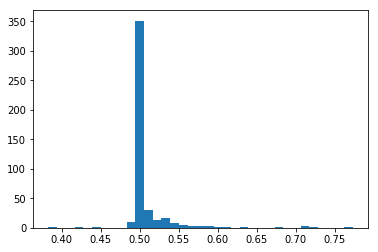

In [161]:
plt.hist(ratios, bins=35)